#### <b><div style='padding:8px;background-color:#003f88;color:white;border-radius:2px;font-size:100%;text-align: left'>Credit Card Fraud Detection</div></b>

This project aims to develop an efficient, scalable, and accurate machine-learning model capable of identifying and preventing fraudulent credit card transactions in real time. By leveraging advanced data processing techniques and classification algorithms, the goal is to minimize financial losses for institutions and protect consumers from fraudulent activities. This solution is designed to enhance the decision-making processes of financial entities, ensuring the early detection of fraud while maintaining operational efficiency and compliance with industry regulations.

### import Required Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
# Load the dataset

data = pd.read_csv(r"C:\Users\Harrison\Downloads\fraud detection\data\creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Data Inspection

In [4]:
data.shape

(284807, 31)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
# Check for missing values
data.isnull().any().sum()

0

There is no null values in the dataset

In [8]:
# Check for duplicates
data.duplicated().sum()

1081

There are 1081 duplicates in the datatset

In [9]:
# Remove duplicates

data = data.drop_duplicates()

In [10]:
# Verify

data.duplicated().sum()

0

In [12]:
# Statistical infor of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,283726.0,94811.077600,47481.047891,0.000000,54204.750000,84692.500000,139298.000000,172792.000000
V1,283726.0,0.005917,1.948026,-56.407510,-0.915951,0.020384,1.316068,2.454930
V2,283726.0,-0.004135,1.646703,-72.715728,-0.600321,0.063949,0.800283,22.057729
V3,283726.0,0.001613,1.508682,-48.325589,-0.889682,0.179963,1.026960,9.382558
V4,283726.0,-0.002966,1.414184,-5.683171,-0.850134,-0.022248,0.739647,16.875344
V5,283726.0,0.001828,1.377008,-113.743307,-0.689830,-0.053468,0.612218,34.801666
V6,283726.0,-0.001139,1.331931,-26.160506,-0.769031,-0.275168,0.396792,73.301626
V7,283726.0,0.001801,1.227664,-43.557242,-0.552509,0.040859,0.570474,120.589494
V8,283726.0,-0.000854,1.179054,-73.216718,-0.208828,0.021898,0.325704,20.007208
V9,283726.0,-0.001596,1.095492,-13.434066,-0.644221,-0.052596,0.595977,15.594995


- Minimum Amount is 0
- Maximum Amount is 25691
- Mean Amount is 88

#### Exploratory Data Analysis

In [13]:
data['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

We can see that the data is highly imbalanced
- 492 transactions are fraud
- 284315 transactions are not fraud

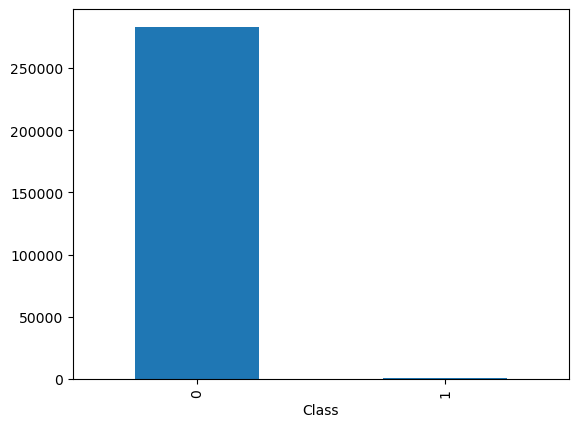

In [14]:
# Visualize

data['Class'].value_counts().plot(kind='bar')
plt.show()

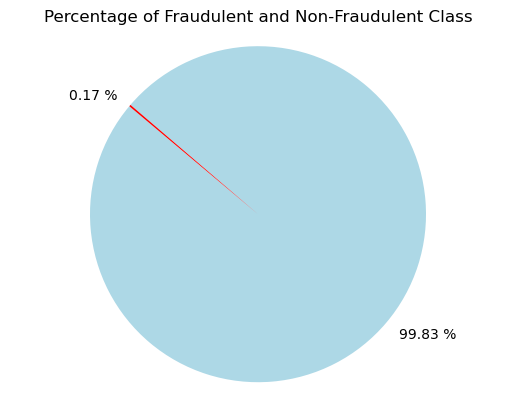

In [15]:
# Plot
plt.pie(data['Class'].value_counts(), 
        labels= [f"{round(data['Class'].value_counts()[0]/len(data)*100,2)} %" ,
                 f"{round(data['Class'].value_counts()[1]/len(data)*100,2)} %" ],
        colors=['lightblue','red'],
       startangle=140)
plt.axis('equal')        
plt.title("Percentage of Fraudulent and Non-Fraudulent Class")    
plt.show()   

As we can see, there is a high class imbalance in the dataset

In [17]:
fraud = data[data.Class == 1]
non_fraud = data[data.Class == 0]

In [18]:
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,...,-0.000489,-0.00115,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


In [19]:
fraud.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [20]:
non_fraud.Amount.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

- #### Distribution of Time and Amount

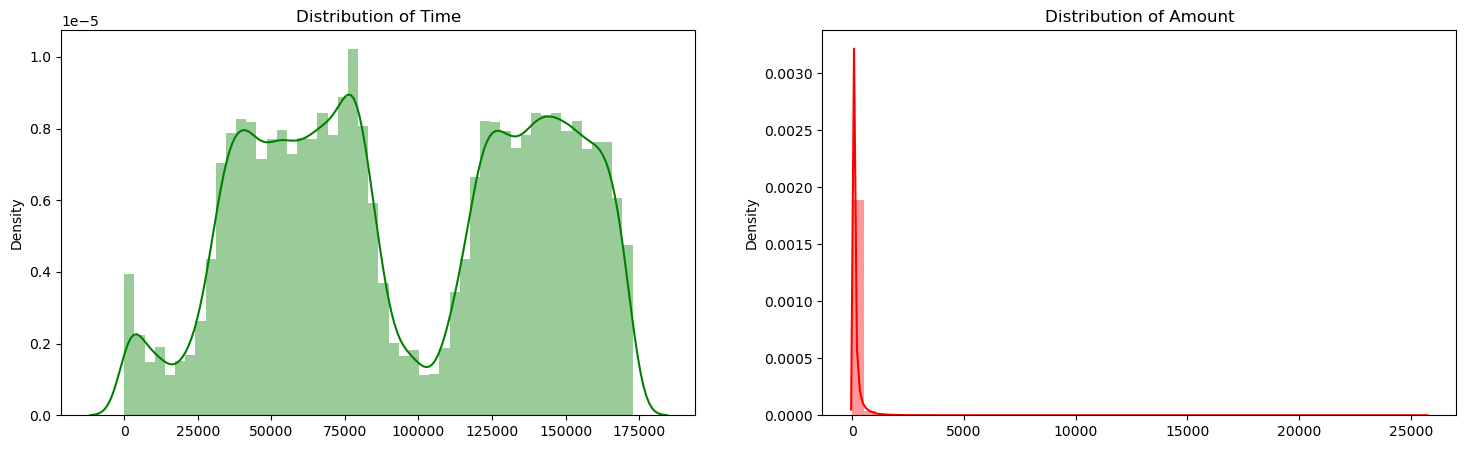

In [21]:
fig , ax = plt.subplots(1,2,figsize=(18,5))
time_values = data['Time'].values
amount_values = data['Amount'].values

sns.distplot(time_values , ax=ax[0],color='g')
ax[0].set_title('Distribution of Time')

sns.distplot(amount_values , ax=ax[1],color='r')
ax[1].set_title("Distribution of Amount")

plt.show()

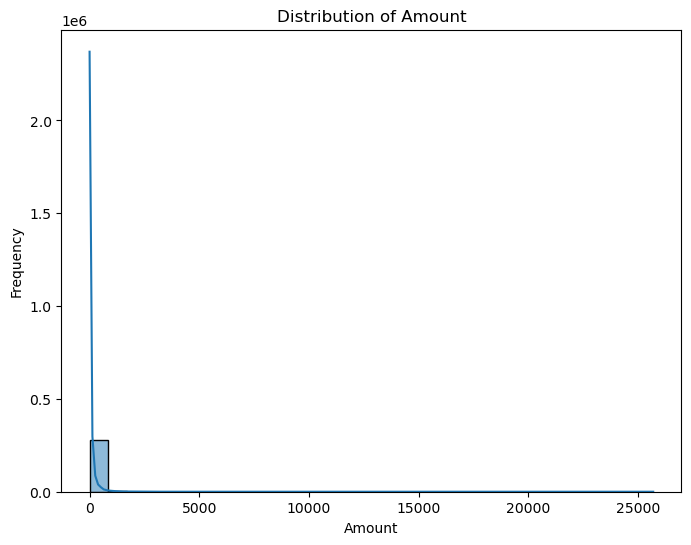

In [25]:
# Plot a histplot for 'Amount' variable

plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Amount', bins=30, kde=True)
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


In [22]:
# drop the column 'Time' (its Unwanted)

data = data.drop('Time', axis=1)

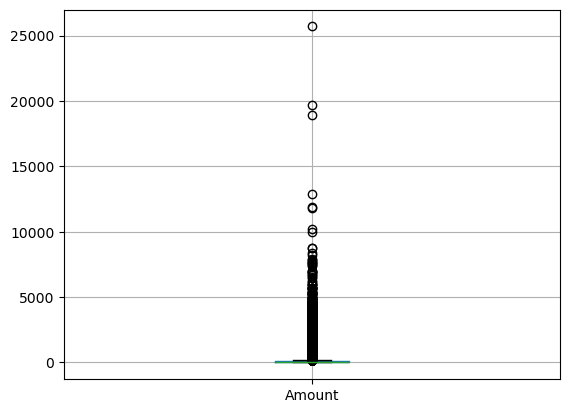

In [23]:
# Check for outliers in Amount

data.boxplot(column='Amount')

plt.show()

The 'Amount' column contains a lot of extreme values or outliers

In [26]:
# lets scale the amount column
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
data['Amount'] = minmax.fit_transform(data[['Amount']])

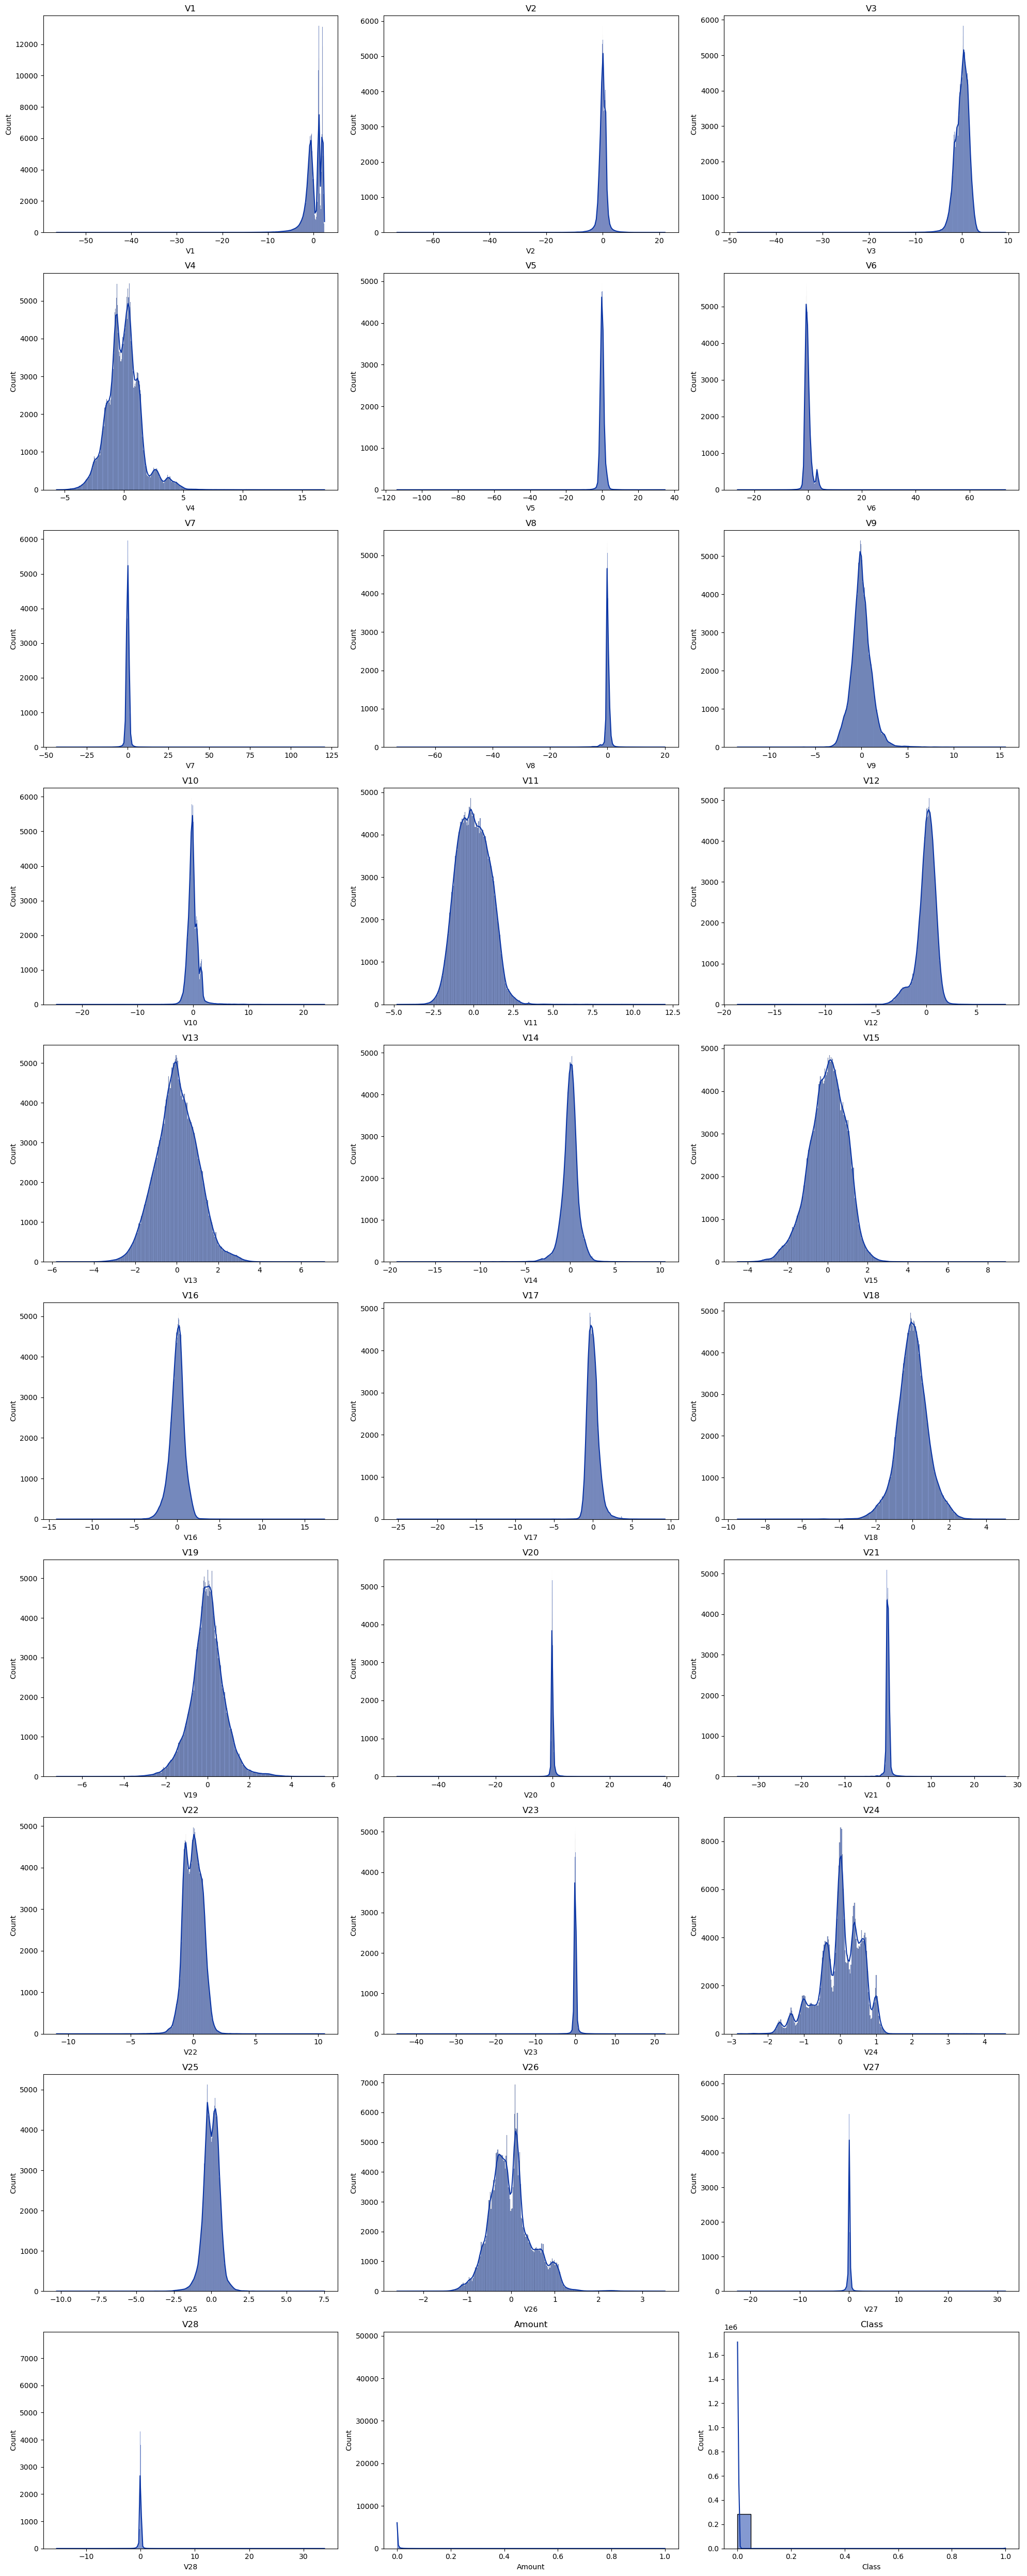

In [27]:
# histplot 
num_cols = [col for col in data.columns if data[col].dtype in ['int64','float64']]
fig , axes = plt.subplots(10,3,figsize=(20,50))
axes = axes.flatten()

for i , col in enumerate(num_cols):
    sns.histplot(data[col],ax=axes[i],color='#0a35a5',kde=True)
    axes[i].set_title(col)
plt.tight_layout()

plt.show()

- #### PDF  (Probability Density Function) and QQ (Quantile-Quantile Plot)

In [28]:
import scipy

def distribution(data,column):
    plt.figure(figsize=(10,4))
    
    # PDF Plot
    plt.subplot(1,2,1)
    sns.distplot(data[column],kde=True,color='#0b43f1')
    plt.title(f"{column} PDF Plot")
    
    # QQ Plot
    plt.subplot(1,2,2)
    scipy.stats.probplot(data[column],dist='norm',plot=plt)
    plt.title(f"{column} Q-Q Plot")
    
    plt.tight_layout()
    plt.show()

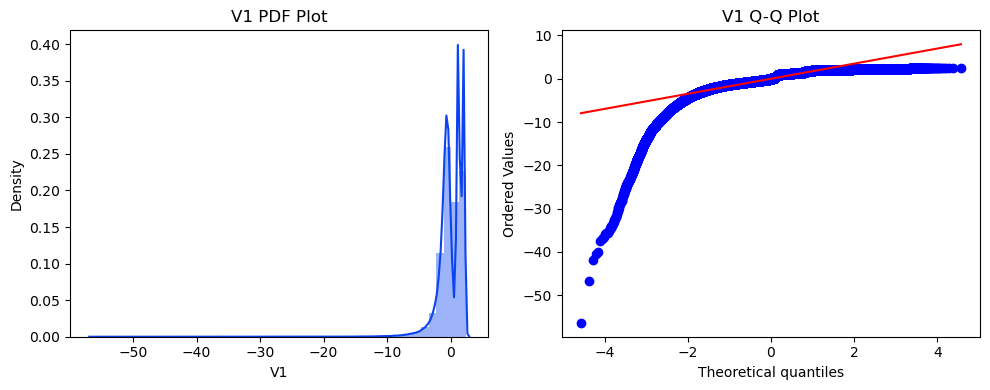

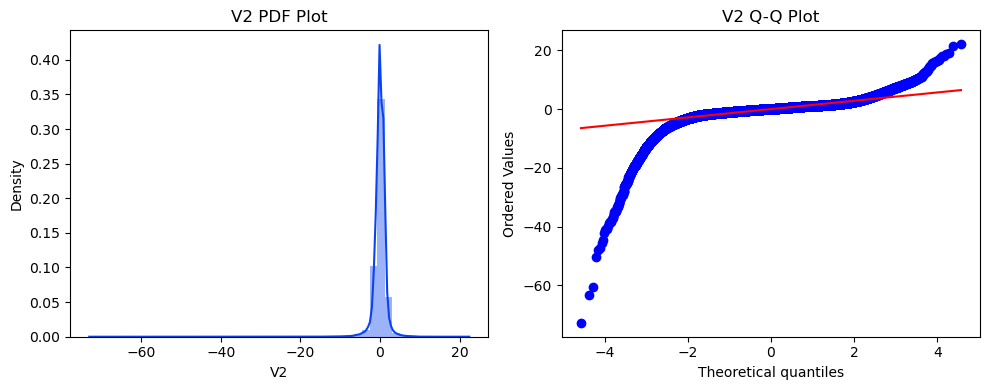

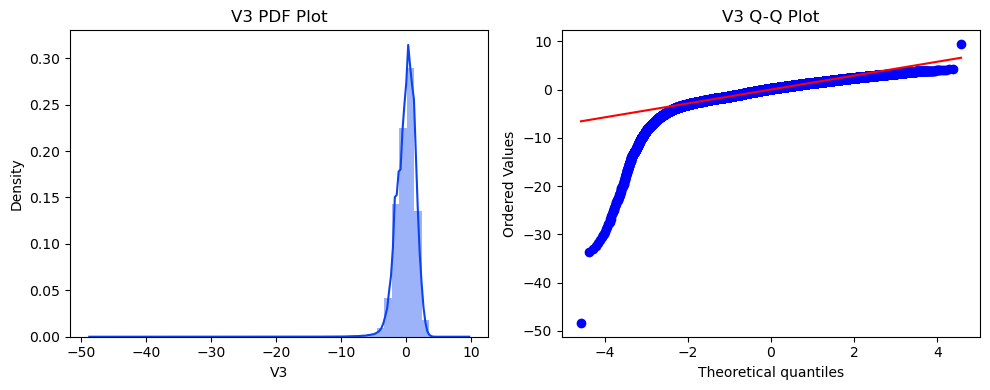

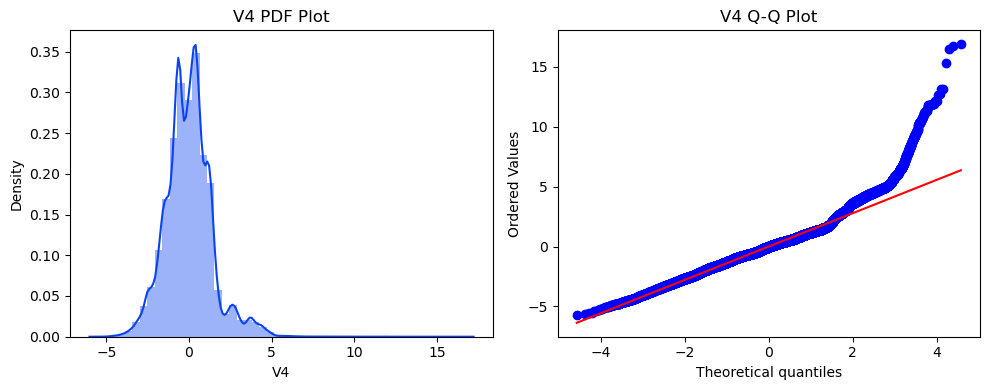

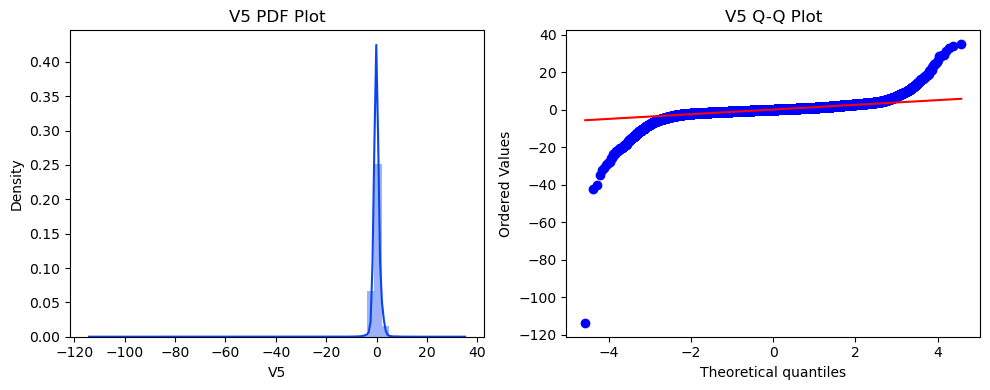

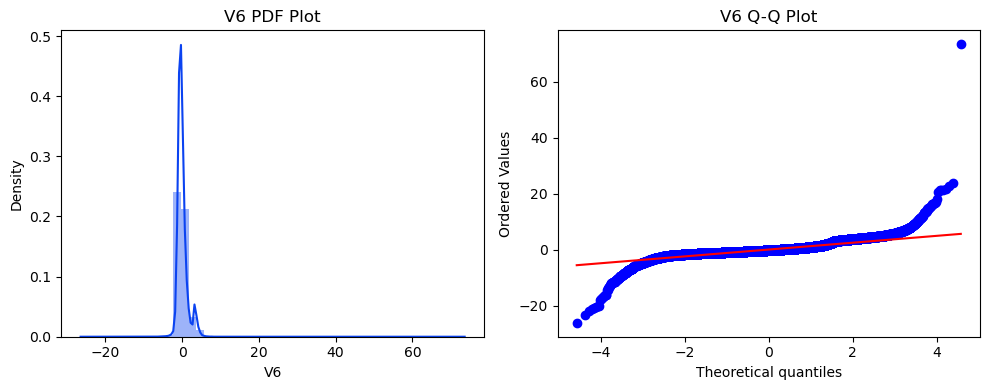

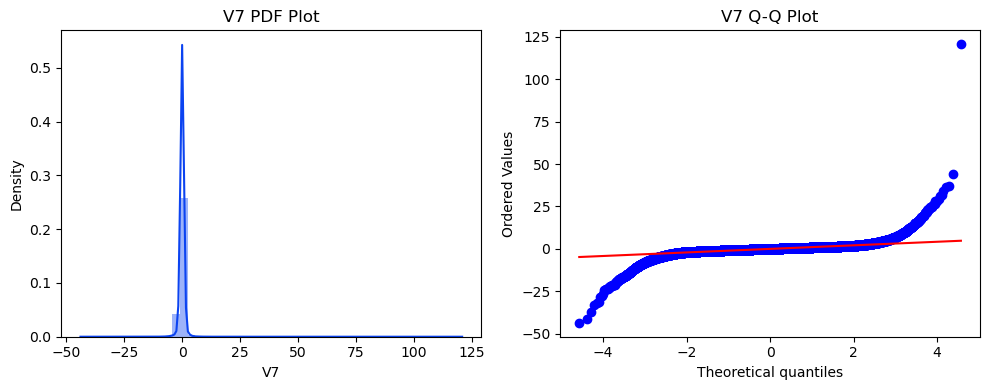

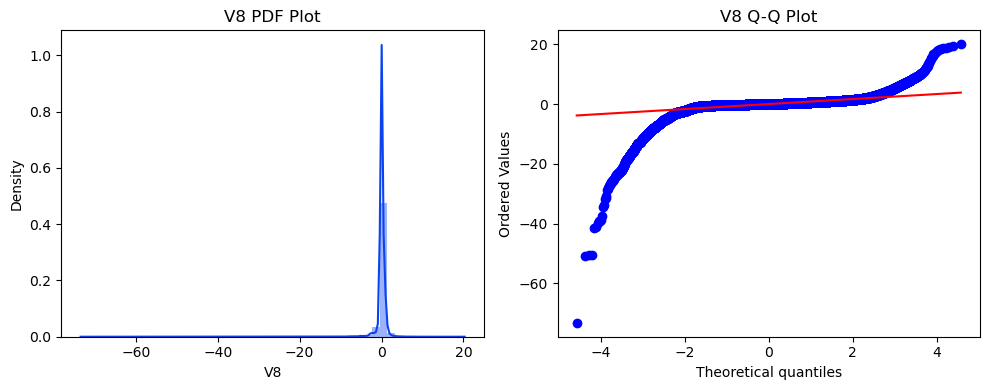

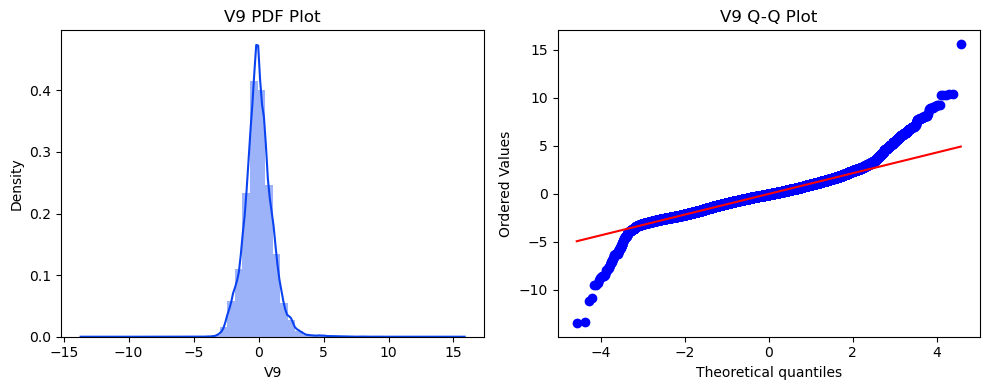

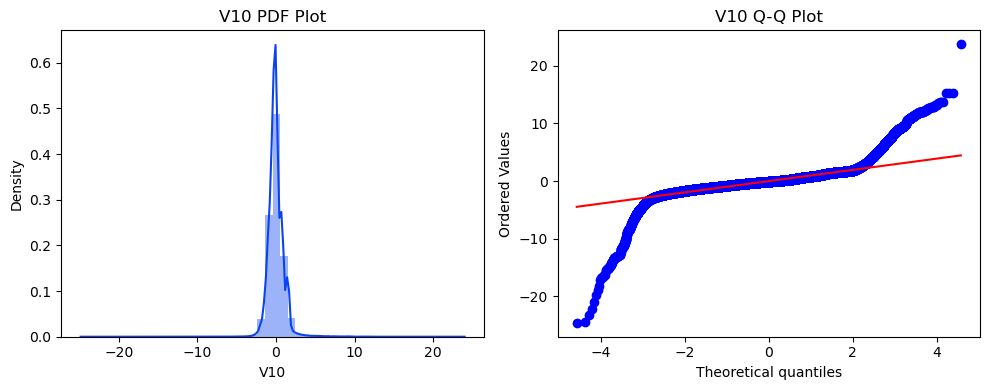

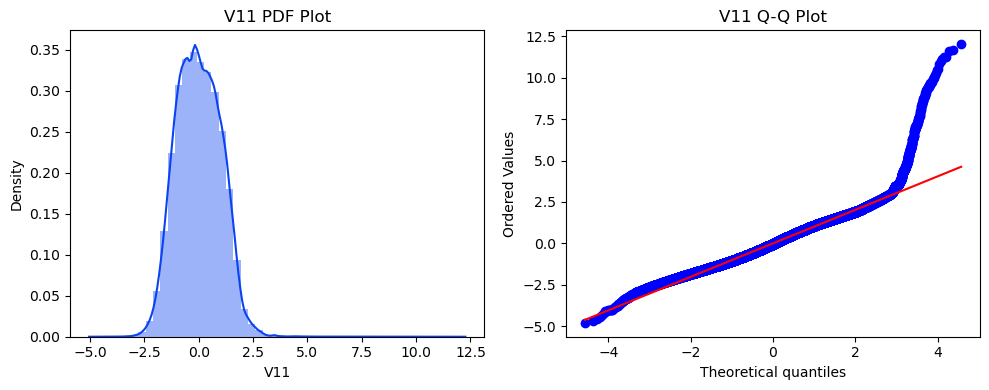

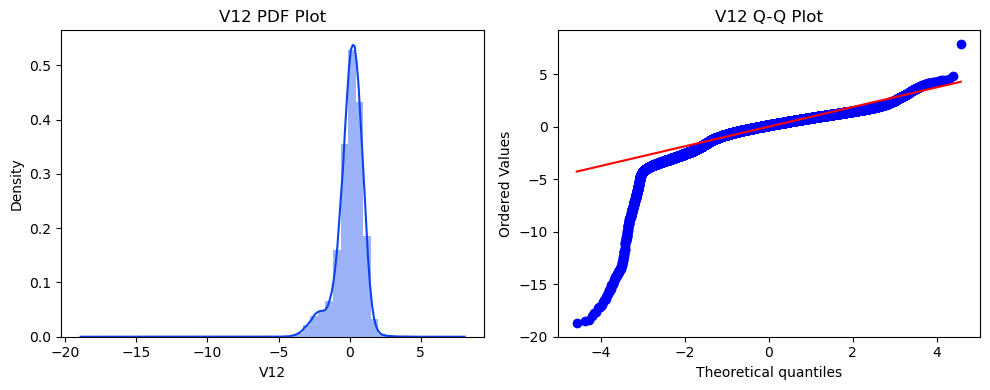

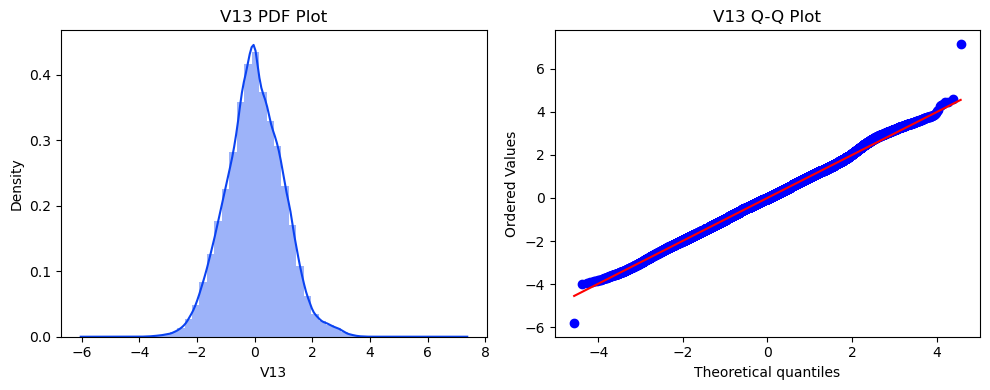

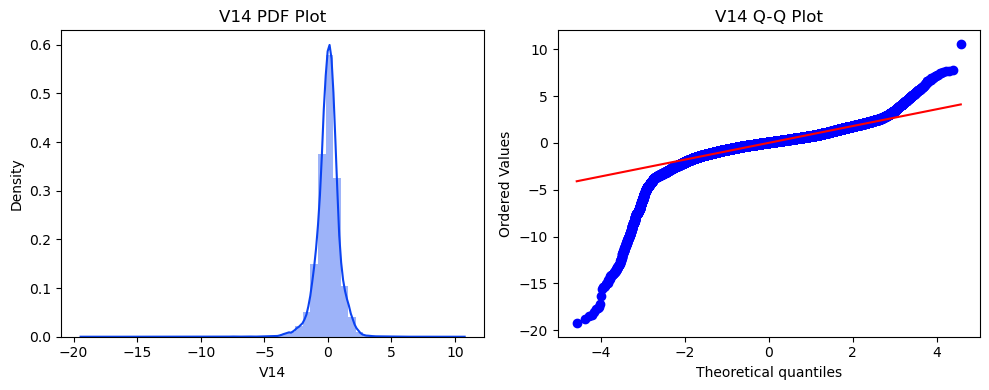

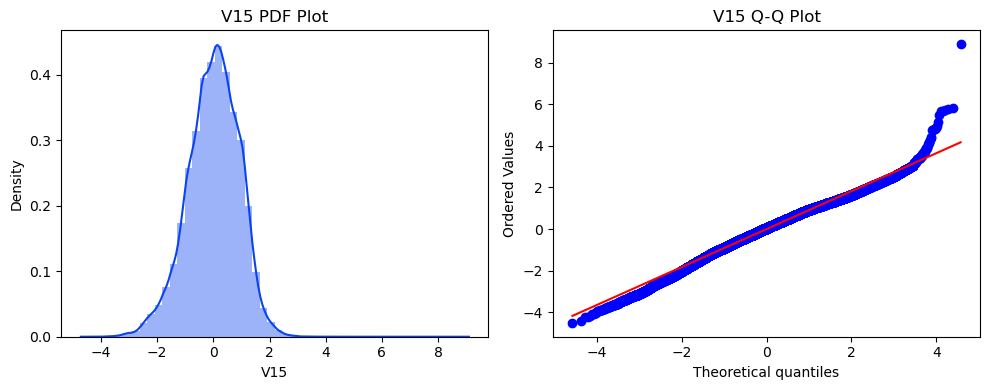

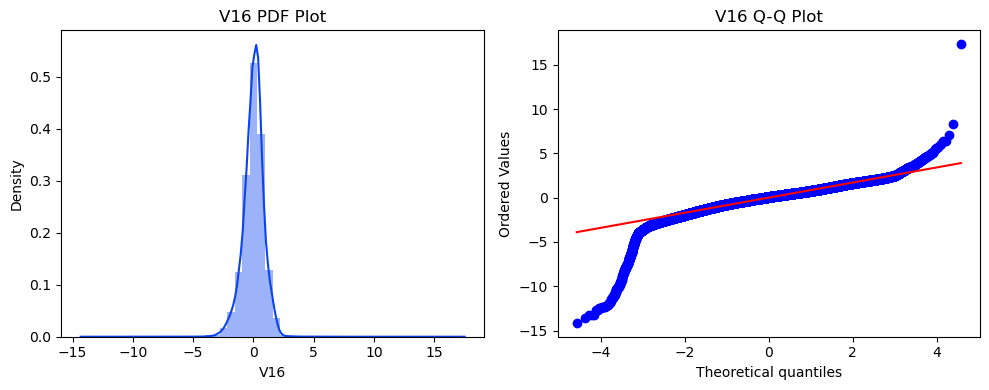

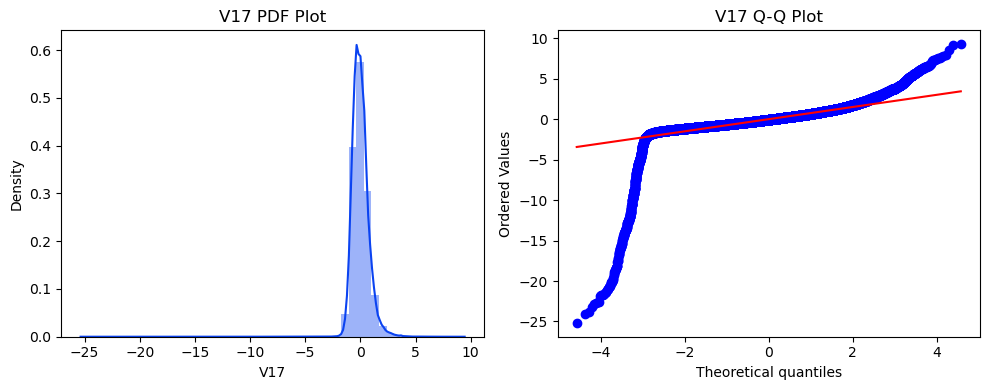

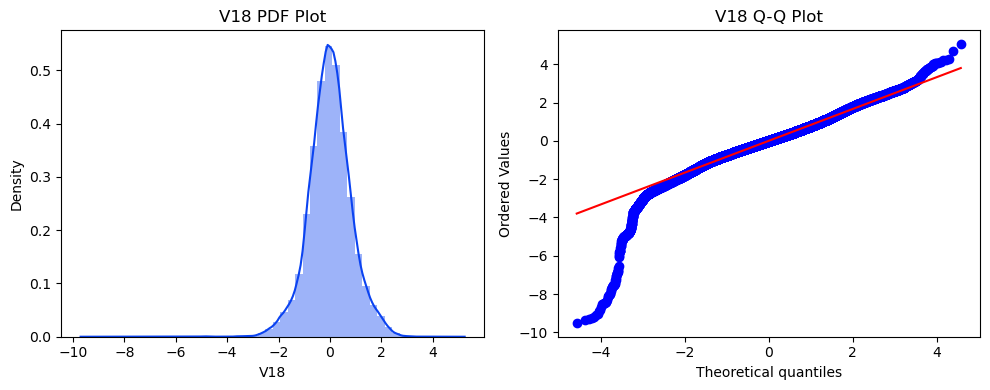

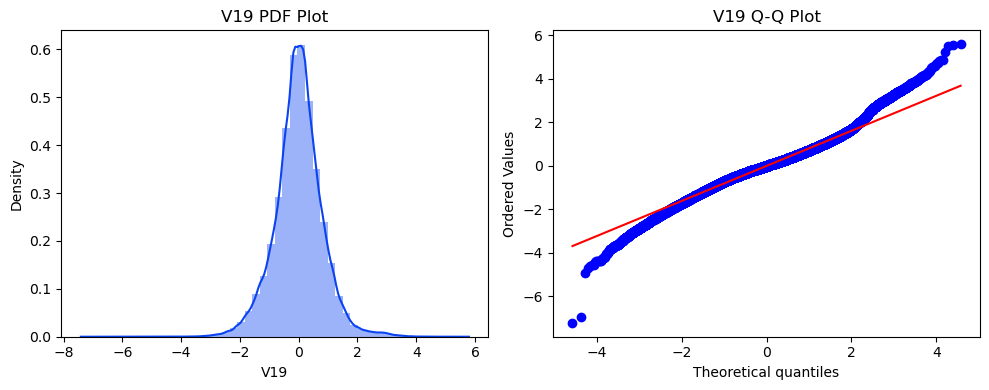

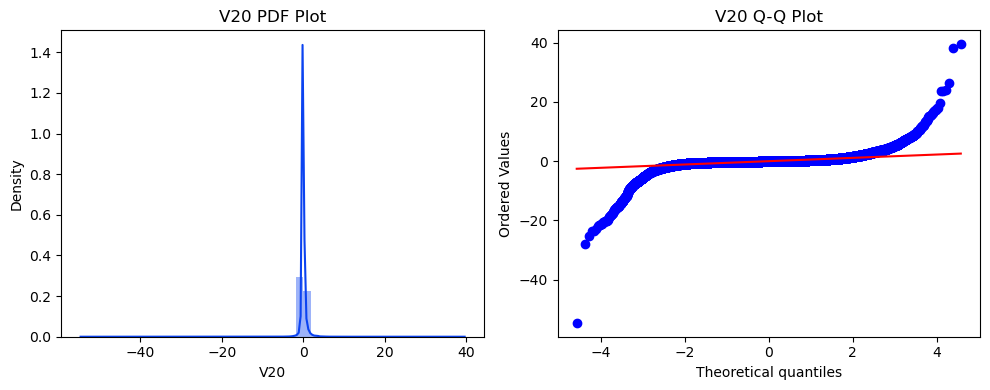

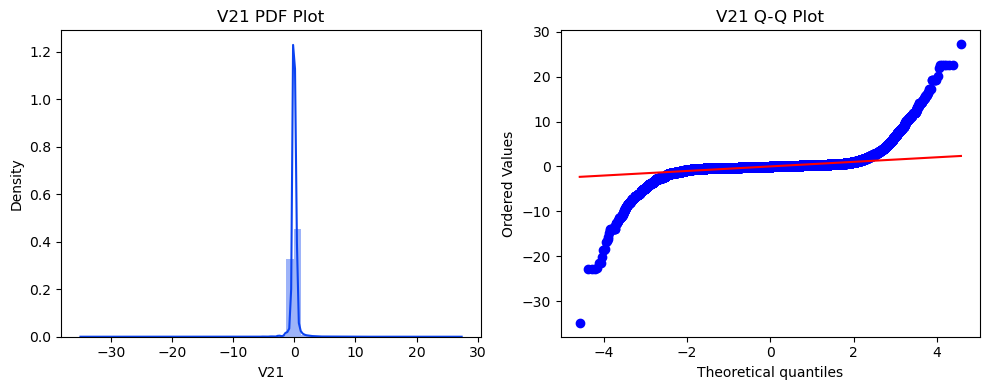

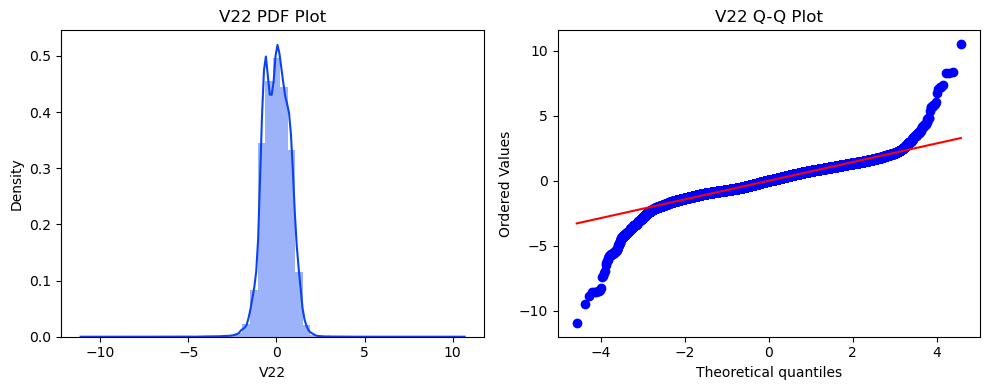

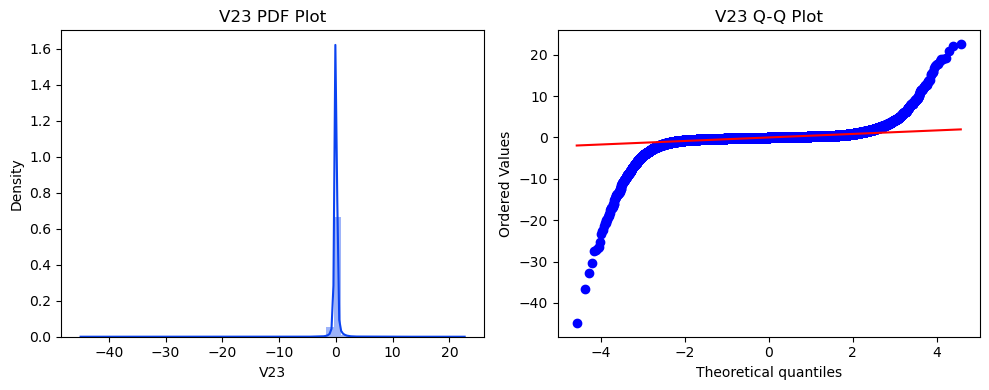

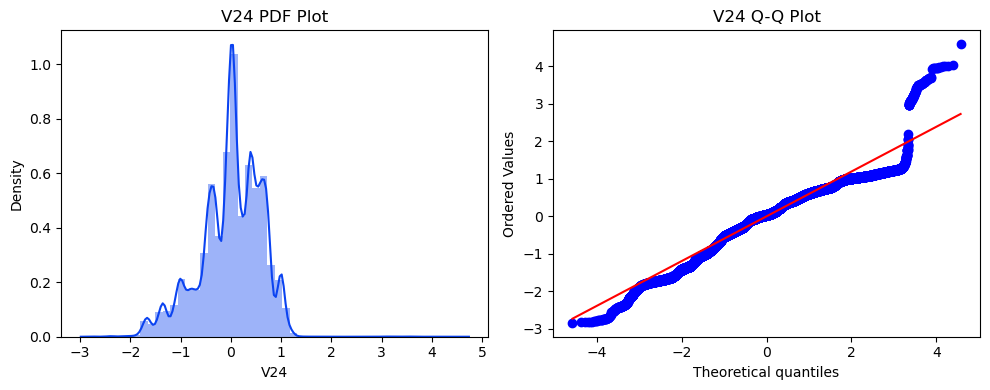

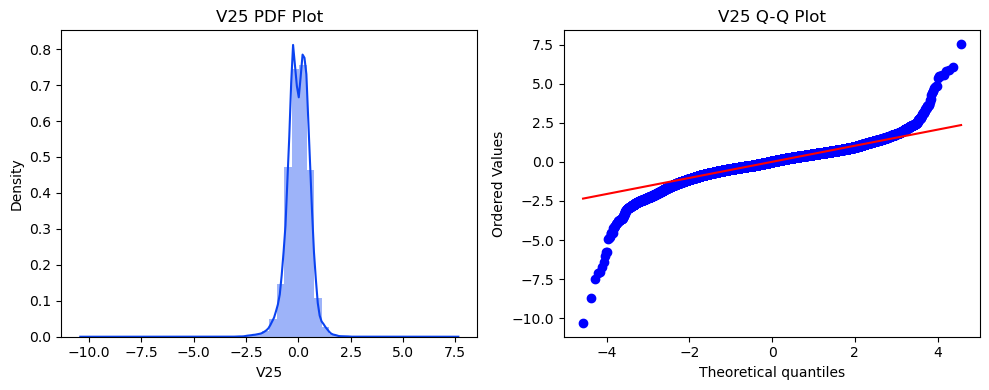

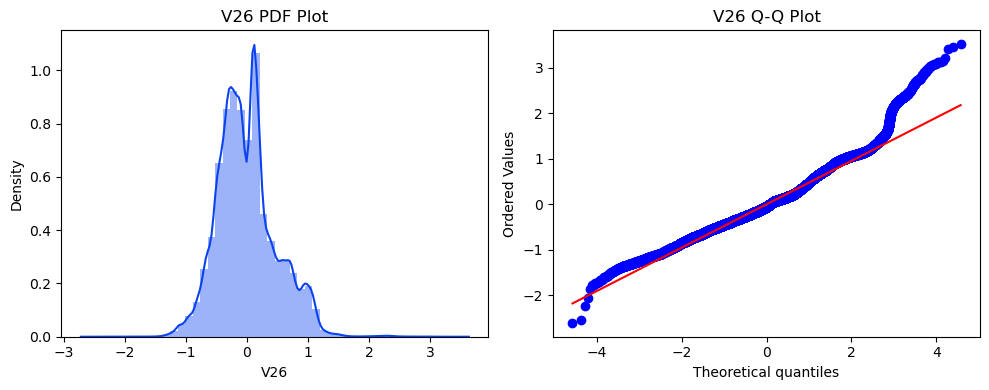

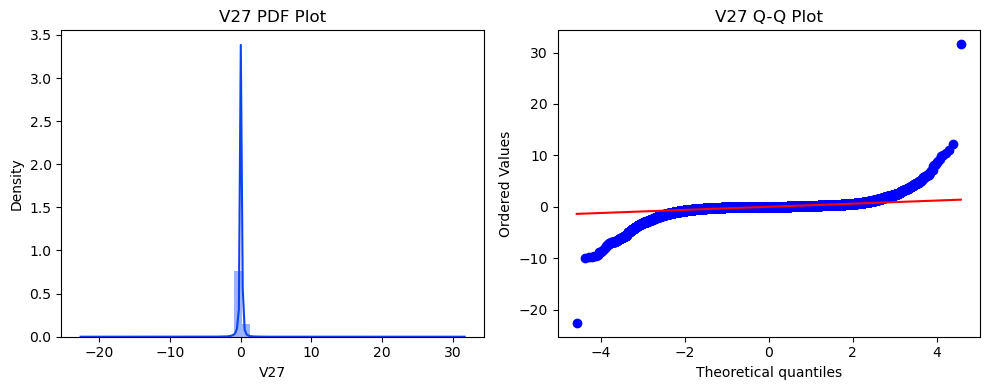

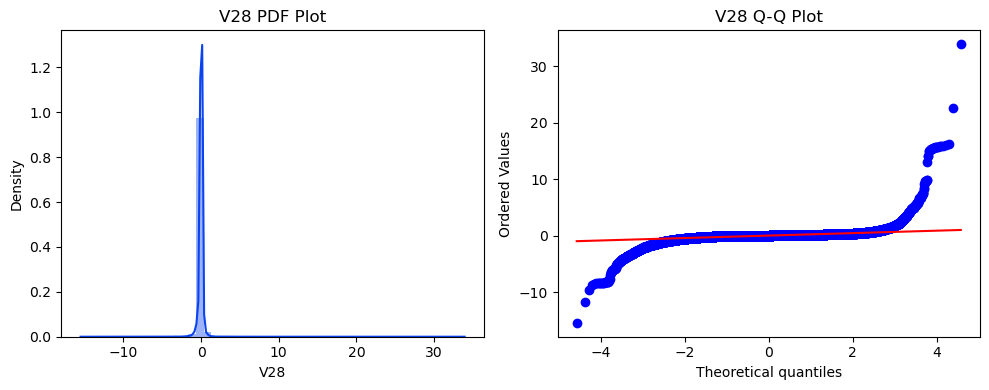

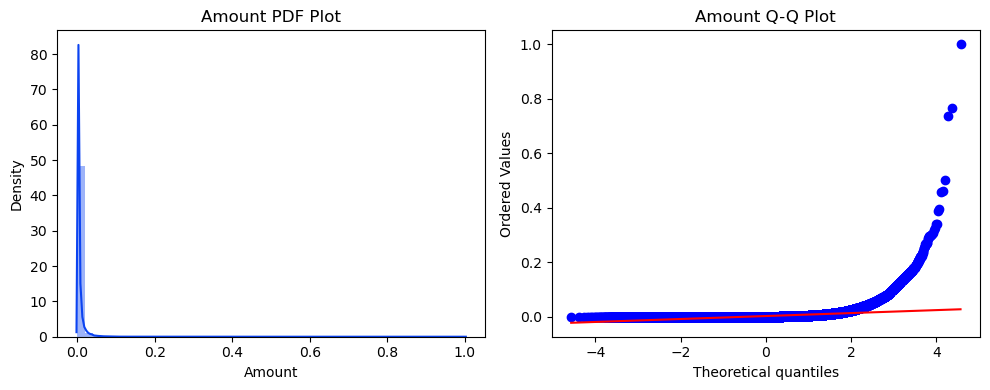

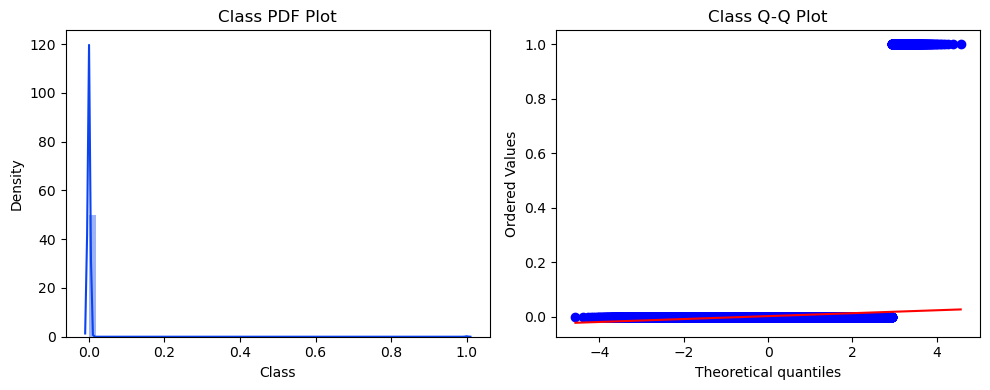

In [29]:
num_cols = [col for col in data.columns if data[col].dtype in ['int64','float64']]
for i in num_cols:
    distribution(data,i)